# Checking all permutations

In [1]:
from environment.environment import Environment
from geometry.coord import Coord
from algorithms.multiple_threats import multiple_threats_shortest_path_with_budget_constraint_given_budget
from geometry.circle import Circle

In [38]:
env = Environment(source=Coord(50, 650), target=Coord(950, 650), circles=[])
env.circles = [Circle(Coord(500, 400), radius=200), Circle(Coord(380, 700), radius=110),
               Circle(Coord(790, 580), radius=130), Circle(Coord(630, 595), radius=20),
               Circle(Coord(585, 615), radius=20), Circle(Coord(645, 645), radius=20)]
env.circles = [Circle(Coord(500, 400), radius=200), Circle(Coord(380, 700), radius=110),
               Circle(Coord(790, 580), radius=130), Circle(Coord(600, 665), radius=70)]

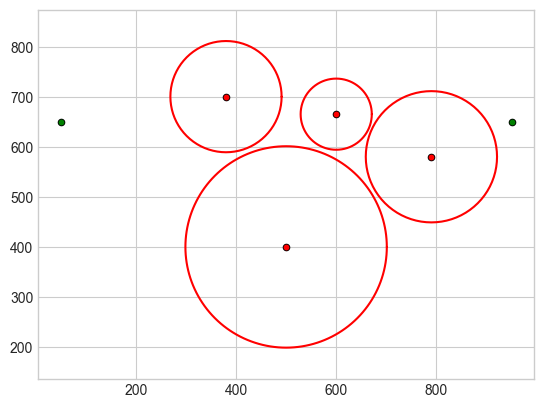

In [39]:
env.plot()

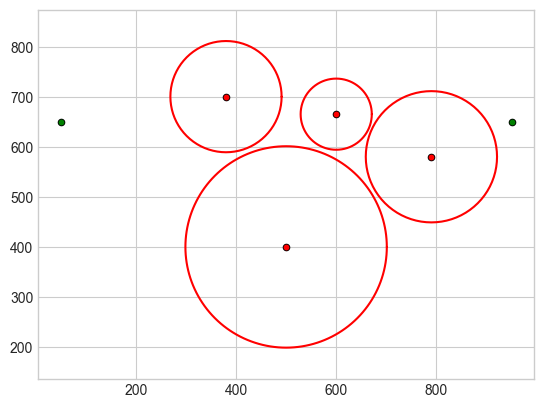

In [40]:
filtered_circles = Environment.filter_circles(env.source, env.target, env.circles)
env.circles = filtered_circles
env.plot()

In [41]:
budget = 0
alphas = [budget / len(env.circles) for circle in env.circles]

In [42]:
path, length, risk = multiple_threats_shortest_path_with_budget_constraint_given_budget(
    env.source, env.target, env.circles, budget, alphas)

  0%|          | 0/24 [00:00<?, ?it/s]c:\users\fogle\pycharmprojects\quick-and-safe\venv\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
  4%|▍         | 1/24 [00:00<00:03,  6.57it/s]

running analytical algorithm
running analytical algorithm


  8%|▊         | 2/24 [00:00<00:10,  2.12it/s]

running analytical algorithm


 12%|█▎        | 3/24 [00:01<00:08,  2.62it/s]

running analytical algorithm


 21%|██        | 5/24 [00:01<00:05,  3.20it/s]

running analytical algorithm
running analytical algorithm


 25%|██▌       | 6/24 [00:01<00:04,  3.84it/s]

running analytical algorithm


 33%|███▎      | 8/24 [00:02<00:05,  3.06it/s]

running analytical algorithm


 38%|███▊      | 9/24 [00:02<00:04,  3.56it/s]

running analytical algorithm
running analytical algorithm
running analytical algorithm


 46%|████▌     | 11/24 [00:03<00:02,  4.47it/s]

running analytical algorithm


 50%|█████     | 12/24 [00:03<00:02,  4.37it/s]

running analytical algorithm


 58%|█████▊    | 14/24 [00:04<00:02,  3.67it/s]

running analytical algorithm
running analytical algorithm


 67%|██████▋   | 16/24 [00:04<00:01,  4.38it/s]

running analytical algorithm
running analytical algorithm


 71%|███████   | 17/24 [00:04<00:01,  4.19it/s]

running analytical algorithm


 79%|███████▉  | 19/24 [00:05<00:01,  4.37it/s]

running analytical algorithm
running analytical algorithm


 83%|████████▎ | 20/24 [00:05<00:00,  4.58it/s]

running analytical algorithm


 88%|████████▊ | 21/24 [00:05<00:00,  3.23it/s]

running analytical algorithm
running analytical algorithm


100%|██████████| 24/24 [00:06<00:00,  3.64it/s]

running analytical algorithm
<generator object multiple_threats_shortest_path_with_budget_constraint_given_budget.<locals>.<genexpr> at 0x000001220186CF90>


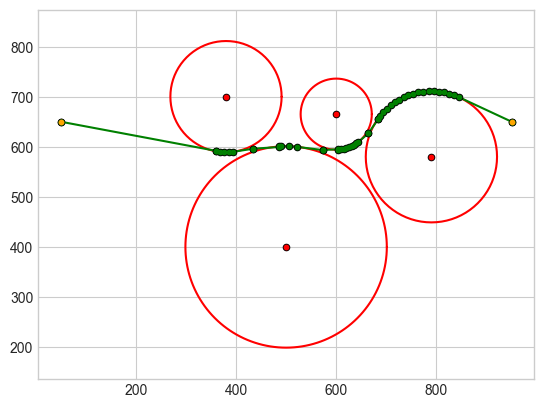

In [43]:
env.plot()
path.plot()

In [324]:
import networkx as nx
import random
from itertools import product
import copy

In [423]:
random.seed(42)

In [424]:
regular_nodes = [Coord(x, 50) for x in range(0, 1000, 100)]
regular_nodes += [Coord(x, 100) for x in range(25, 1000, 100)]
source = Coord(0, 75)
target = Coord(1000, 75)
all_nodes = [source, target] + regular_nodes
edges = random.choices(list(product(all_nodes, all_nodes)), k=100)
# edges = [(n1, n2) for n1, n2 in zip(all_nodes[:-1], all_nodes[1:])]
# edges += random.choices(list(product(all_nodes, all_nodes)), k=50)

In [425]:
g = nx.DiGraph()

In [426]:
g.add_nodes_from(all_nodes)
g.add_edges_from(edges)
g.remove_edges_from(list(nx.selfloop_edges(g)) + [(source, target), (target, source)])

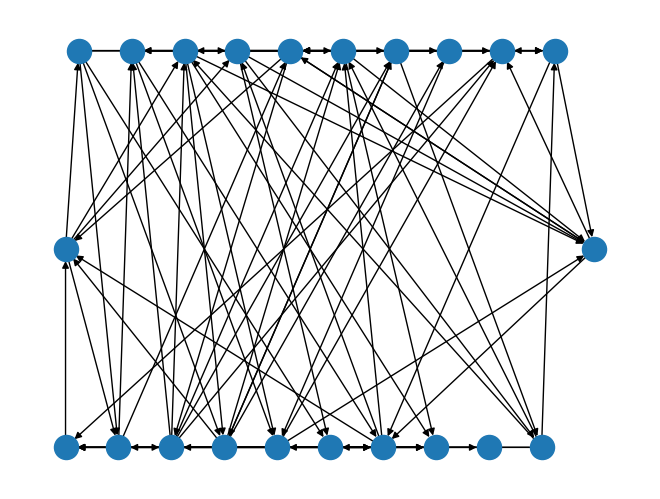

In [427]:
nx.draw(g, pos={c: (c.x, c.y) for c in all_nodes})

In [428]:
prev_edges = copy.deepcopy(g.edges)

In [429]:
# for node in regular_nodes:
#     g.remove_node(node)
#     g.add_edge(Coord(node.x, node.y), Coord(node.x, node.y+10), weight = -1, capacity = 1)

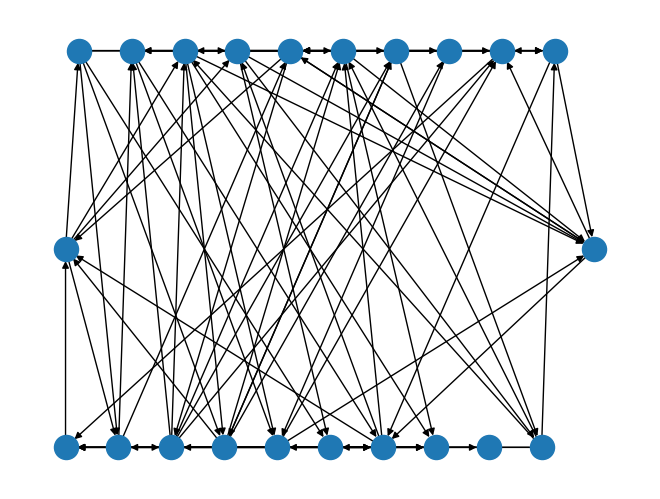

In [430]:
nx.draw(g, pos={c: (c.x, c.y) for c in g.nodes})

In [431]:
for edge in prev_edges:
    u, v = edge

    if u != source or u != target:
        g.remove_edge(u, v)
        g.add_edge(u, Coord(u.x, u.y + 100), capacity=1, weight=-1)
        g.add_edge(Coord(u.x, u.y + 100), v, capacity=1)

virtual_source = Coord(source.x - 100, source.y)
g.add_edge(virtual_source, source, capacity=1)

{(Coord(0,75), Coord(0,175)): Text(0.0, 125.0, '1'),
 (Coord(1000,75), Coord(1000,175)): Text(1000.0, 125.0, '1'),
 (Coord(0,50), Coord(0,150)): Text(0.0, 100.0, '1'),
 (Coord(100,50), Coord(100,150)): Text(100.0, 100.0, '1'),
 (Coord(200,50), Coord(200,150)): Text(200.0, 100.0, '1'),
 (Coord(300,50), Coord(300,150)): Text(300.0, 100.0, '1'),
 (Coord(400,50), Coord(400,150)): Text(400.0, 100.0, '1'),
 (Coord(500,50), Coord(500,150)): Text(500.0, 100.0, '1'),
 (Coord(600,50), Coord(600,150)): Text(600.0, 100.0, '1'),
 (Coord(700,50), Coord(700,150)): Text(700.0, 100.0, '1'),
 (Coord(800,50), Coord(800,150)): Text(800.0, 100.0, '1'),
 (Coord(900,50), Coord(900,150)): Text(900.0, 100.0, '1'),
 (Coord(25,100), Coord(25,200)): Text(25.0, 150.0, '1'),
 (Coord(125,100), Coord(125,200)): Text(125.0, 150.0, '1'),
 (Coord(225,100), Coord(225,200)): Text(225.0, 150.0, '1'),
 (Coord(325,100), Coord(325,200)): Text(325.0, 150.0, '1'),
 (Coord(425,100), Coord(425,200)): Text(425.0, 150.0, '1'),
 (Co

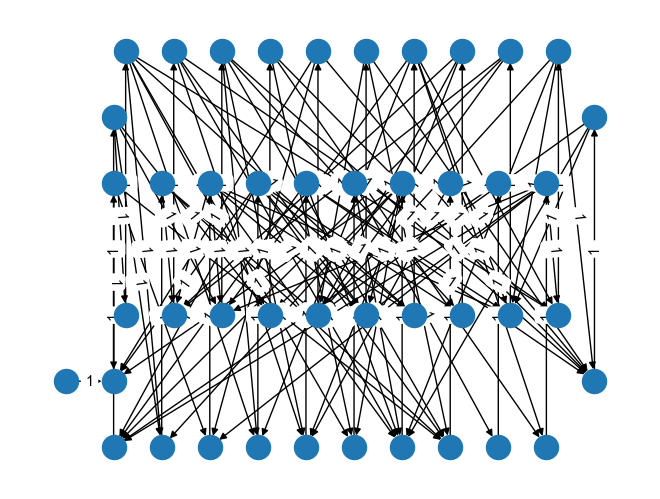

In [432]:
labels = nx.get_edge_attributes(g,'capacity')
nx.draw(g, pos={c: (c.x, c.y) for c in g.nodes})

nx.draw_networkx_edge_labels(g, pos={c: (c.x, c.y) for c in g.nodes},edge_labels=labels)

In [433]:
flow_nodes = nx.max_flow_min_cost(g, virtual_source, target)
color_map = ['red' if len(flow_nodes[node]) > 0 else 'blue' for node in g.nodes]

In [434]:
flow_nodes

{Coord(0,75): {Coord(0,175): 1},
 Coord(1000,75): {Coord(1000,175): 1},
 Coord(0,50): {Coord(0,150): 1},
 Coord(100,50): {Coord(100,150): 0},
 Coord(200,50): {Coord(200,150): 1},
 Coord(300,50): {Coord(300,150): 1},
 Coord(400,50): {Coord(400,150): 1},
 Coord(500,50): {Coord(500,150): 1},
 Coord(600,50): {Coord(600,150): 1},
 Coord(700,50): {Coord(700,150): 1},
 Coord(800,50): {Coord(800,150): 1},
 Coord(900,50): {Coord(900,150): 1},
 Coord(25,100): {Coord(25,200): 1},
 Coord(125,100): {Coord(125,200): 1},
 Coord(225,100): {Coord(225,200): 1},
 Coord(325,100): {Coord(325,200): 1},
 Coord(425,100): {Coord(425,200): 1},
 Coord(525,100): {Coord(525,200): 1},
 Coord(625,100): {Coord(625,200): 1},
 Coord(725,100): {Coord(725,200): 1},
 Coord(825,100): {Coord(825,200): 1},
 Coord(925,100): {Coord(925,200): 1},
 Coord(0,175): {Coord(25,100): 1,
  Coord(225,100): 0,
  Coord(100,50): 0,
  Coord(325,100): 0},
 Coord(1000,175): {Coord(825,100): 1, Coord(425,100): 0, Coord(600,50): 0},
 Coord(0,15

{(Coord(0,75), Coord(0,175)): Text(0.0, 125.0, '1'),
 (Coord(1000,75), Coord(1000,175)): Text(1000.0, 125.0, '1'),
 (Coord(0,50), Coord(0,150)): Text(0.0, 100.0, '1'),
 (Coord(100,50), Coord(100,150)): Text(100.0, 100.0, '1'),
 (Coord(200,50), Coord(200,150)): Text(200.0, 100.0, '1'),
 (Coord(300,50), Coord(300,150)): Text(300.0, 100.0, '1'),
 (Coord(400,50), Coord(400,150)): Text(400.0, 100.0, '1'),
 (Coord(500,50), Coord(500,150)): Text(500.0, 100.0, '1'),
 (Coord(600,50), Coord(600,150)): Text(600.0, 100.0, '1'),
 (Coord(700,50), Coord(700,150)): Text(700.0, 100.0, '1'),
 (Coord(800,50), Coord(800,150)): Text(800.0, 100.0, '1'),
 (Coord(900,50), Coord(900,150)): Text(900.0, 100.0, '1'),
 (Coord(25,100), Coord(25,200)): Text(25.0, 150.0, '1'),
 (Coord(125,100), Coord(125,200)): Text(125.0, 150.0, '1'),
 (Coord(225,100), Coord(225,200)): Text(225.0, 150.0, '1'),
 (Coord(325,100), Coord(325,200)): Text(325.0, 150.0, '1'),
 (Coord(425,100), Coord(425,200)): Text(425.0, 150.0, '1'),
 (Co

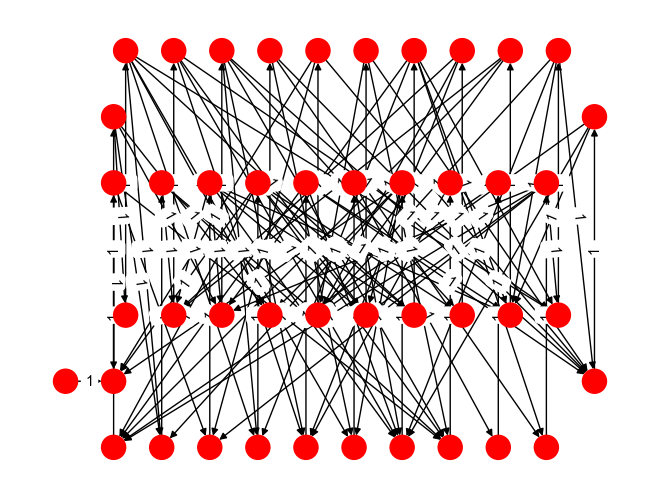

In [435]:
labels = nx.get_edge_attributes(g,'capacity')
nx.draw(g, pos={c: (c.x, c.y) for c in g.nodes}, node_color=color_map)
nx.draw_networkx_edge_labels(g, pos={c: (c.x, c.y) for c in g.nodes},edge_labels=labels)

In [323]:
for node1, node2, data in g.edges(data=True):
    print(node1)
    print(node2)
    print(data)

Coord(0,50)
Coord(0,60)
{'weight': -1, 'capacity': 1}
Coord(0,60)
Coord(100,50)
{'capacity': 1}
Coord(0,60)
Coord(0,75)
{'capacity': 1}
Coord(0,60)
Coord(200,50)
{'capacity': 1}
Coord(100,50)
Coord(100,60)
{'weight': -1, 'capacity': 1}
Coord(100,60)
Coord(200,50)
{'capacity': 1}
Coord(100,60)
Coord(700,50)
{'capacity': 1}
Coord(200,50)
Coord(200,60)
{'weight': -1, 'capacity': 1}
Coord(200,60)
Coord(300,50)
{'capacity': 1}
Coord(200,60)
Coord(825,100)
{'capacity': 1}
Coord(200,60)
Coord(525,100)
{'capacity': 1}
Coord(200,60)
Coord(600,50)
{'capacity': 1}
Coord(200,60)
Coord(625,100)
{'capacity': 1}
Coord(300,50)
Coord(300,60)
{'weight': -1, 'capacity': 1}
Coord(300,60)
Coord(400,50)
{'capacity': 1}
Coord(300,60)
Coord(0,75)
{'capacity': 1}
Coord(300,60)
Coord(0,50)
{'capacity': 1}
Coord(400,50)
Coord(400,60)
{'weight': -1, 'capacity': 1}
Coord(400,60)
Coord(500,50)
{'capacity': 1}
Coord(400,60)
Coord(1000,75)
{'capacity': 1}
Coord(400,60)
Coord(600,50)
{'capacity': 1}
Coord(400,60)
Coor

In [408]:
n1, n2, n3, n4, n5 = Coord(200, 100), Coord(300, 0), Coord(500, 0), Coord(700, 600), Coord(900, 0)
nodes = [n1, n2, n3, n4, n5]
source = Coord(0, 50)
target = Coord(1000, 50)
all_nodes = [source, target] + nodes
edges = [(source, n1), (source, n2), (source, n3), (source, n4), (source, n5), (source, target),
         (n1, n2), (n1, n3), (n1, n4), (n1, n5), (n1, target),
         (n2, n1), (n2, n3), (n2, n4), (n2, n5), (n2, target),
         (n3, n4), (n3, n5), (n3, target),
         (n4, n1), (n4, n2), (n4, n3), (n4, n5), (n4, target),
         (n5, target)]

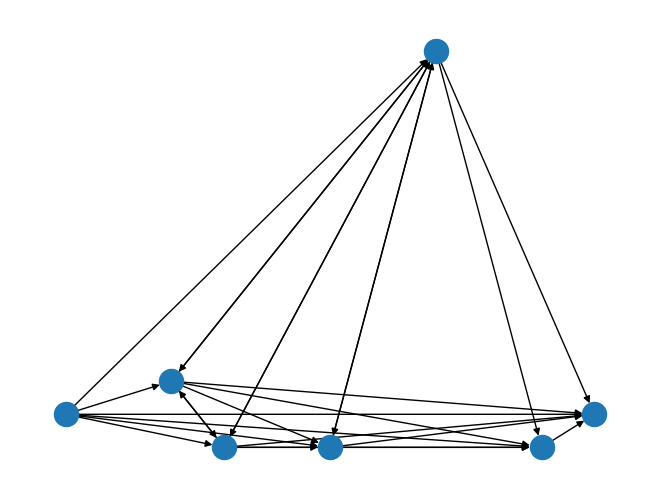

In [409]:
g = nx.DiGraph()
g.add_nodes_from(all_nodes)
g.add_edges_from(edges)
nx.draw(g, pos={c: (c.x, c.y) for c in all_nodes})

In [410]:
prev_edges = copy.deepcopy(g.edges)

In [411]:
for edge in prev_edges:
    u, v = edge

    if u != source or u != target:
        g.remove_edge(u, v)
        g.add_edge(u, Coord(u.x, u.y + 100), capacity=1, weight=-1)
        g.add_edge(Coord(u.x, u.y + 100), v, capacity=1)

virtual_source = Coord(source.x - 100, source.y)
g.add_edge(virtual_source, source, capacity=1)

In [412]:
flow_nodes = nx.max_flow_min_cost(g, virtual_source, target)
nodes_colors = ['red' if sum(flow_nodes[node].values()) > 0 else 'blue' for node in g.nodes]
nodes_colors = ['orange' if node == source or node == target else color for node, color in zip(g.nodes, nodes_colors)]
edges_colors = ['red' if flow_nodes[u][v] == 1 else 'black' for u, v in g.edges]

In [436]:
[flow_nodes[u][v] for u, v in g.edges]

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1]

{(Coord(0,50), Coord(0,150)): Text(0.0, 100.0, '1'),
 (Coord(200,100), Coord(200,200)): Text(200.0, 150.0, '1'),
 (Coord(300,0), Coord(300,100)): Text(300.0, 50.0, '1'),
 (Coord(500,0), Coord(500,100)): Text(500.0, 50.0, '1'),
 (Coord(700,600), Coord(700,700)): Text(700.0, 650.0, '1'),
 (Coord(900,0), Coord(900,100)): Text(900.0, 50.0, '1'),
 (Coord(0,150), Coord(200,100)): Text(100.0, 125.0, '1'),
 (Coord(0,150), Coord(300,0)): Text(150.0, 75.0, '1'),
 (Coord(0,150), Coord(500,0)): Text(250.0, 75.0, '1'),
 (Coord(0,150), Coord(700,600)): Text(350.0, 375.0, '1'),
 (Coord(0,150), Coord(900,0)): Text(450.0, 75.0, '1'),
 (Coord(0,150), Coord(1000,50)): Text(500.0, 100.0, '1'),
 (Coord(200,200), Coord(300,0)): Text(250.0, 100.0, '1'),
 (Coord(200,200), Coord(500,0)): Text(350.0, 100.0, '1'),
 (Coord(200,200), Coord(700,600)): Text(450.0, 400.0, '1'),
 (Coord(200,200), Coord(900,0)): Text(550.0, 100.0, '1'),
 (Coord(200,200), Coord(1000,50)): Text(600.0, 125.0, '1'),
 (Coord(300,100), Coord

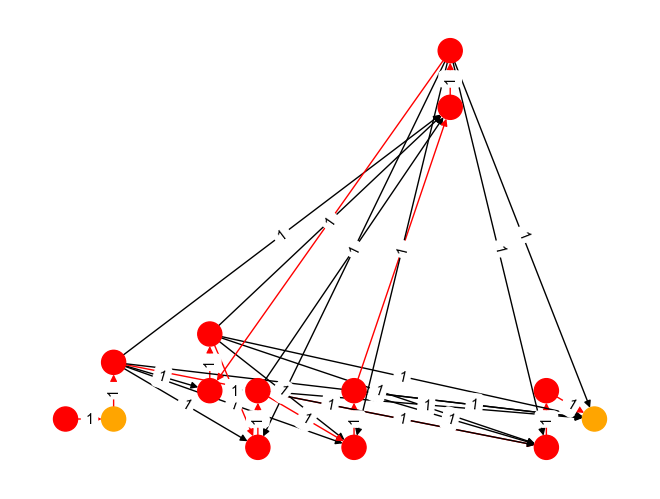

In [413]:
labels = nx.get_edge_attributes(g,'capacity')
nx.draw(g, pos={c: (c.x, c.y) for c in g.nodes}, node_color=nodes_colors, edge_color=edges_colors)
nx.draw_networkx_edge_labels(g,pos={c: (c.x, c.y) for c in g.nodes}, edge_labels=labels)